ugrizzly spline interpolation code

In [1]:
#Importing needed packages
import matplotlib.pyplot as plt
import ellc
import scipy
from scipy.optimize import curve_fit
from scipy import interpolate
import pylab
import numpy as np
from numpy.polynomial.polynomial import polyfit

In [2]:
#Stellar Conditions/Filter sets for telescopes
T1 = 4500      #Effective temp. in Kelvin
logg1 = 4.5     #log gravity
M_H = 0         #Metallicity of stars

#Filters
filters = [ 'B','C','H','I','J','K','Kp','R','U','V','b','u','v','y','u_','g_','r_','i_','z_' ] #All filters form ellc
SDSSfilters = ['u_','g_','r_','i_','z_', "J", 'H', "K" ]  #Only 2MASS/SDSS filters (8 in total)

#Filter wavelengths - correspond to above filter lists
wavelength = [442, 398, 1630, 879.9, 1220, 2190, 640, 634.9, 364, 540, 435, 354, 410.3, 547, 360, 464, 621.5, 754.5, 870]
SDSSwavelength = [354, 464, 621.5, 754.5, 870, 1220, 1630, 2190]

In [3]:
####FILTER WAVELENGTHS####
#https://en.wikipedia.org/wiki/Photometric_system
#Sloan filters:
 # u_ = 354nm
 # g_ = 464nm
 # r_ = 621.5nm
 # i_ = 754.5nm
 # z_ = 870nm
 # y in range 923.8–1084.5 nm
 # y = 1004nm (FWHM from LSST table) - https://www.lsst.org/about/camera/features
    
#2MASS filters
#http://www.ukidss.org/technical/instrument/filters.html
# J = 1220nm
# H = 1630nm  
# K = 2190nm  

#Johnson filters:
 # U = 364nm
 # B = 442nm
 # V = 540nm
 # R = 634.9nm
 # I = 879.7nm

# C = 1547.5nm

# http://spiff.rit.edu/classes/phys440/lectures/filters/filters.html
# v = 410.3nm
#b = 435nm

#Kp = 2120nm  - assuming this one corresponds to 'Kepler'
#https://books.google.com/books?id=totGBQAAQBAJ&pg=PA421&lpg=PA421&dq=S1+filter+astronomy&source=bl&ots=6o1AGaLhpO&sig=iGDTxIw2nNkUWqOBRAi6H1fpw2s&hl=en&sa=X&ved=0ahUKEwiglqqHxpLcAhWF5IMKHR6kAOsQ6AEIaTAD#v=onepage&q=S1%20filter%20astronomy&f=false


In [4]:
# Setting up dictionary for all filters (including non-Sloan/2MASS)

filtVals = dict()
filtVals['a1'] = np.array([])
filtVals['a2'] = np.array([])
filtVals['a3'] = np.array([])
filtVals['a4'] = np.array([])
for w,f in zip(wavelength, filters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    filtVals['a1'] = np.append(filtVals['a1'], a1)
    filtVals['a2'] = np.append(filtVals['a2'], a2)
    filtVals['a3'] = np.append(filtVals['a3'], a3)
    filtVals['a4'] = np.append(filtVals['a4'], a4)
    
# print(filtVals)

In [5]:
# SDSS/2MASS filter dictionary
SDSSfiltVals = dict()
SDSSfiltVals['a1'] = np.array([])
SDSSfiltVals['a2'] = np.array([])
SDSSfiltVals['a3'] = np.array([])
SDSSfiltVals['a4'] = np.array([])
for w,f in zip(SDSSwavelength, SDSSfilters):
    ldy_filt = ellc.ldy.LimbGravityDarkeningCoeffs(f)
    a1, a2, a3, a4, y = ldy_filt(T1, logg1, M_H)
    SDSSfiltVals['a1'] = np.append(SDSSfiltVals['a1'], a1)
    SDSSfiltVals['a2'] = np.append(SDSSfiltVals['a2'], a2)
    SDSSfiltVals['a3'] = np.append(SDSSfiltVals['a3'], a3)
    SDSSfiltVals['a4'] = np.append(SDSSfiltVals['a4'], a4)

# print(SDSSfiltVals)

In [6]:
# Function to interpolate LDC from spline function
def spline_interpolation(wave_length):
    test_wavelengths = SDSSwavelength
    FilterValues = SDSSfiltVals['a1']
    tck = interpolate.splrep(test_wavelengths, FilterValues)
    return interpolate.splev(wave_length, tck)

The y-band a1 coefficient from spline interpolation is: 0.6915573041622949


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


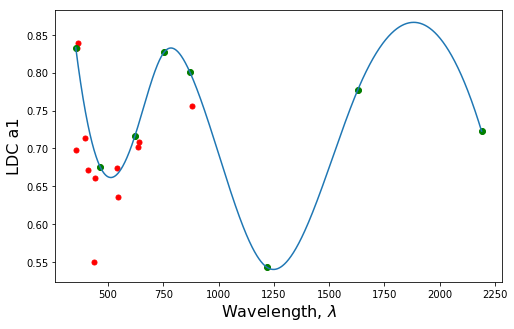

In [35]:
# Plot a1 values

f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a1'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a1'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a1', fontsize = 16)

# print(SDSSfiltVals['a1']) #Can print dictionary value if needed
# print(' ')
print('The y-band a1 coefficient from spline interpolation is:', spline_interpolation(1004))

xnew = np.linspace(354,2190,1000)
a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], xnew, order = 3)
ax.plot(xnew, a1spline)
# f.savefig('A1_splinefit.pdf')

The y-band a2 coefficient from spline interpolation is: 0.6915573041622949


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


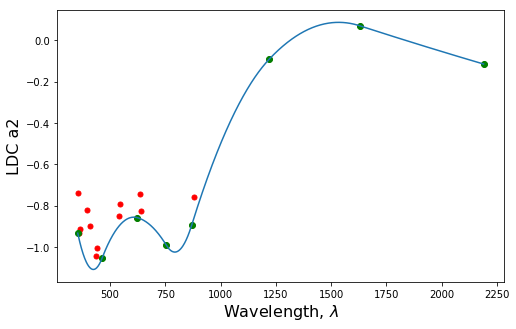

In [31]:
#A2 Spline fit

#Plot a1 values
f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a2'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a2'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a2', fontsize = 16)

# print(SDSSfiltVals['a2']) #Can print dictionary values if needed
# print(' ')
print('The y-band a2 coefficient from spline interpolation is:', spline_interpolation(1004))
#
a2spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], xnew, order = 2)
ax.plot(xnew, a2spline)
f.savefig('A2_splinefit.pdf')
f.savefig('a2_splinefit.png')

The y-band a3 coefficient from spline interpolation is: 0.6915573041622949


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


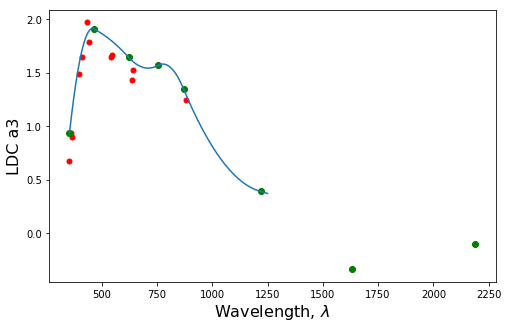

In [14]:
#A3 spline fit

#Plot a1 values
f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a3'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a3'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a3', fontsize = 16)

# print(SDSSfiltVals['a3']) #Can print dictionary values if needed
# print(' ')
print('The y-band a3 coefficient from spline interpolation is:', spline_interpolation(1004))

a3spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], xnew, order = 2)
ax.plot(xnew, a3spline)
# f.savefig('A3_splinefit.pdf')


The y-band a4 coefficient from spline interpolation is: 0.6915573041622949


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


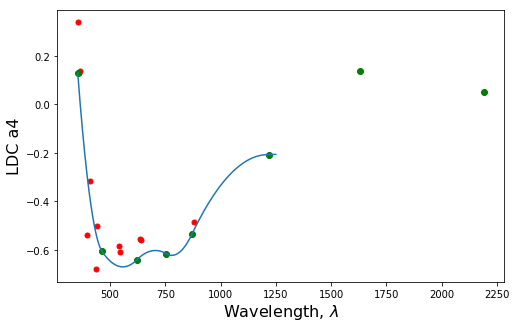

In [15]:
#A4 spline fit

#Plot a1 values
f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a4'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a4'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a4', fontsize = 16)

# print(SDSSfiltVals['a4']) #Can print dictionary values if needed
# print(' ')
print('The y-band a4 coefficient from spline interpolation is:', spline_interpolation(1004))

a4spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], xnew, order = 2)
ax.plot(xnew, a4spline)
# f.savefig('A4_splinefit.pdf')

In [ ]:
#Trying to exclude JHK filters with shorter xnew array in next boxes

The y-band a1 coefficient from spline interpolation is: 0.6915573041622949


/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


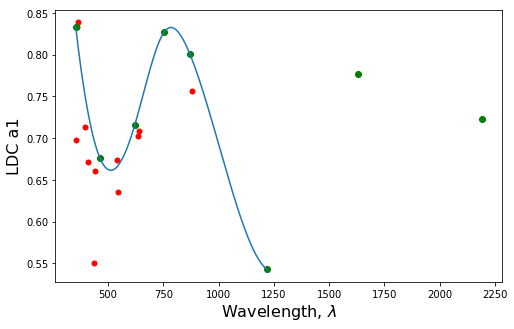

In [36]:
# A1 truncated spline - JHK excluded

f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a1'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a1'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a1', fontsize = 16)

# print(SDSSfiltVals['a1']) #Can print dictionary value if needed
# print(' ')
print('The y-band a1 coefficient from spline interpolation is:', spline_interpolation(1004))

xnew = np.linspace(354,1220,1000)
a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a1'], xnew, order = 3)
ax.plot(xnew, a1spline)

/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


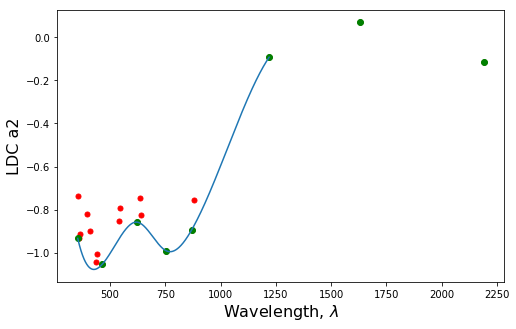

In [37]:
# A2 truncated spline - JHK excluded
f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a2'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a2'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a2', fontsize = 16)

a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a2'], xnew, order = 3)
ax.plot(xnew, a1spline)

/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':


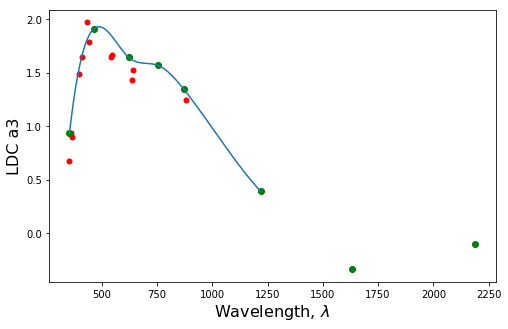

In [38]:
# A3 truncated spline - JHK excluded

f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a3'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a3'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a3', fontsize = 16)

a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a3'], xnew, order = 3)
ax.plot(xnew, a1spline)

/Users/andrewbowen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  if __name__ == '__main__':


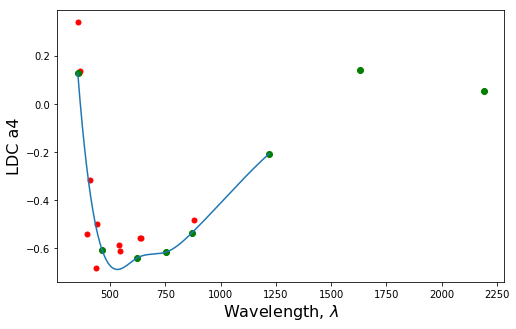

In [39]:
# A4 truncated spline - JHK excluded

f,ax = plt.subplots(figsize = (8,5))
ax.plot(wavelength, filtVals['a4'], 'ro', markersize = 5)
ax.plot(SDSSwavelength, SDSSfiltVals['a4'], 'go')
ax.set_xlabel('Wavelength, $\lambda$', fontsize = 16)
ax.set_ylabel('LDC a4', fontsize = 16)

a1spline = scipy.interpolate.spline(SDSSwavelength, SDSSfiltVals['a4'], xnew, order = 3)
ax.plot(xnew, a1spline)

In [40]:
#Using Stack Overflow method of excluding points